In [27]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
diabetes_data=pd.read_csv("/content/diabetes (1).csv")

In [29]:
diabetes_data.describe()

Pregnancies      Glucose  BloodPressure  SkinThickness      Insulin  \
count  2000.000000  2000.000000    2000.000000    2000.000000  2000.000000   
mean      3.703500   121.182500      69.145500      20.935000    80.254000   
std       3.306063    32.068636      19.188315      16.103243   111.180534   
min       0.000000     0.000000       0.000000       0.000000     0.000000   
25%       1.000000    99.000000      63.500000       0.000000     0.000000   
50%       3.000000   117.000000      72.000000      23.000000    40.000000   
75%       6.000000   141.000000      80.000000      32.000000   130.000000   
max      17.000000   199.000000     122.000000     110.000000   744.000000   

               BMI  DiabetesPedigreeFunction          Age      Outcome  
count  2000.000000               2000.000000  2000.000000  2000.000000  
mean     32.193000                  0.470930    33.090500     0.342000  
std       8.149901                  0.323553    11.786423     0.474498  
min       0.000000                  0.078000    21.000000     0.000000  
25%      27.375000                  0.244000    24.000000     0.000000  
50%      32.300000                  0.376000    29.000000     0.000000  
75%      36.800000                  0.624000    40.000000     1.000000  
max      80.600000                  2.420000    81.000000     1.000000

In [30]:
diabetes_data[diabetes_data['Glucose'] == 0]

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
20              6        0             68             41        0  39.0   
75              1        0             48             20        0  24.7   
182             1        0             74             20       23  27.7   
342             1        0             68             35        0  32.0   
349             5        0             80             32        0  41.0   
502             6        0             68             41        0  39.0   
812             1        0             68             35        0  32.0   
819             5        0             80             32        0  41.0   
972             6        0             68             41        0  39.0   
1340            1        0             74             20       23  27.7   
1595            1        0             68             35        0  32.0   
1602            5        0             80             32        0  41.0   
1896            1        0             48             20        0  24.7   

      DiabetesPedigreeFunction  Age  Outcome  
20                       0.727   41        1  
75                       0.140   22        0  
182                      0.299   21        0  
342                      0.389   22        0  
349                      0.346   37        1  
502                      0.727   41        1  
812                      0.389   22        0  
819                      0.346   37        1  
972                      0.727   41        1  
1340                     0.299   21        0  
1595                     0.389   22        0  
1602                     0.346   37        1  
1896                     0.140   22        0

In [31]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [32]:
diabetes_data.duplicated().sum()
diabetes_data.drop_duplicates(inplace=True)

In [33]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 744 entries, 0 to 1568
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               744 non-null    int64  
 1   Glucose                   744 non-null    int64  
 2   BloodPressure             744 non-null    int64  
 3   SkinThickness             744 non-null    int64  
 4   Insulin                   744 non-null    int64  
 5   BMI                       744 non-null    float64
 6   DiabetesPedigreeFunction  744 non-null    float64
 7   Age                       744 non-null    int64  
 8   Outcome                   744 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 58.1 KB


In [34]:
columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in columns:
    diabetes_data[col].replace(0, np.NaN, inplace=True)

diabetes_data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   744.000000  739.000000     710.000000     529.000000  385.000000   
mean      3.752688  121.710419      72.261972      29.406427  153.698701   
std       3.335541   30.456331      12.332675      11.137877  112.839569   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.500000      64.000000      22.000000   76.000000   
50%       3.000000  117.000000      72.000000      29.000000  126.000000   
75%       6.000000  141.000000      80.000000      36.000000  190.000000   
max      17.000000  199.000000     122.000000     110.000000  744.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  734.000000                744.000000  744.000000  744.000000  
mean    32.668801                  0.472355   33.142473    0.340054  
std      7.341531                  0.326181   11.751286    0.474046  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.244000   24.000000    0.000000  
50%     32.400000                  0.375500   29.000000    0.000000  
75%     36.800000                  0.632500   40.250000    1.000000  
max     80.600000                  2.420000   81.000000    1.000000

In [35]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 744 entries, 0 to 1568
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               744 non-null    int64  
 1   Glucose                   739 non-null    float64
 2   BloodPressure             710 non-null    float64
 3   SkinThickness             529 non-null    float64
 4   Insulin                   385 non-null    float64
 5   BMI                       734 non-null    float64
 6   DiabetesPedigreeFunction  744 non-null    float64
 7   Age                       744 non-null    int64  
 8   Outcome                   744 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 58.1 KB


In [36]:
diabetes_data.dropna(inplace=True)

diabetes_data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   381.000000  381.000000     381.000000     381.000000  381.000000   
mean      3.254593  122.624672      70.708661      29.270341  153.889764   
std       3.169055   30.647801      12.437704      10.630536  113.097366   
min       0.000000   56.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.000000      62.000000      21.000000   76.000000   
50%       2.000000  119.000000      70.000000      29.000000  126.000000   
75%       5.000000  143.000000      78.000000      37.000000  190.000000   
max      17.000000  198.000000     110.000000      63.000000  744.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  381.000000                381.000000  381.000000  381.000000  
mean    33.177690                  0.524530   30.787402    0.320210  
std      7.105995                  0.335632   10.140822    0.467171  
min     18.200000                  0.085000   21.000000    0.000000  
25%     28.400000                  0.282000   23.000000    0.000000  
50%     33.300000                  0.452000   27.000000    0.000000  
75%     37.200000                  0.687000   36.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [37]:
dataset = diabetes_data.values
print(dataset.shape)

(381, 9)


In [38]:
X = dataset[:,0:8]
Y = dataset[:, 8].astype(int)

In [39]:
print(X.shape)
print(Y.shape)
print(Y[:5])

(381, 8)
(381,)
[0 1 0 0 0]


In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)

In [41]:
X_standardized = scaler.transform(X)

data = pd.DataFrame(X_standardized)
data.describe()


0             1             2             3             4  \
count  3.810000e+02  3.810000e+02  3.810000e+02  3.810000e+02  3.810000e+02   
mean   7.459766e-17  2.331177e-18  3.893066e-16  1.072341e-16  2.331177e-17   
std    1.001315e+00  1.001315e+00  1.001315e+00  1.001315e+00  1.001315e+00   
min   -1.028342e+00 -2.176739e+00 -3.760347e+00 -2.097695e+00 -1.238523e+00   
25%   -7.123758e-01 -7.718576e-01 -7.011031e-01 -7.790027e-01 -6.896021e-01   
50%   -3.964094e-01 -1.184241e-01 -5.705179e-02 -2.546407e-02 -2.469238e-01   
75%    5.514900e-01  6.656961e-01  5.869995e-01  7.280745e-01  3.197043e-01   
max    4.343087e+00  2.462638e+00  3.163205e+00  3.177075e+00  5.224580e+00   

                  5             6             7  
count  3.810000e+02  3.810000e+02  3.810000e+02  
mean  -1.328771e-16  1.142277e-16  1.270491e-16  
std    1.001315e+00  1.001315e+00  1.001315e+00  
min   -2.110526e+00 -1.311281e+00 -9.664179e-01  
25%   -6.732305e-01 -7.235571e-01 -7.689359e-01  
50%    1.723482e-02 -2.163843e-01 -3.739718e-01  
75%    5.667889e-01  4.847075e-01  5.146972e-01  
max    4.780037e+00  5.654887e+00  4.958042e+00

In [42]:
X = diabetes_data.drop('Outcome', axis=1).values
y = diabetes_data['Outcome'].values

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

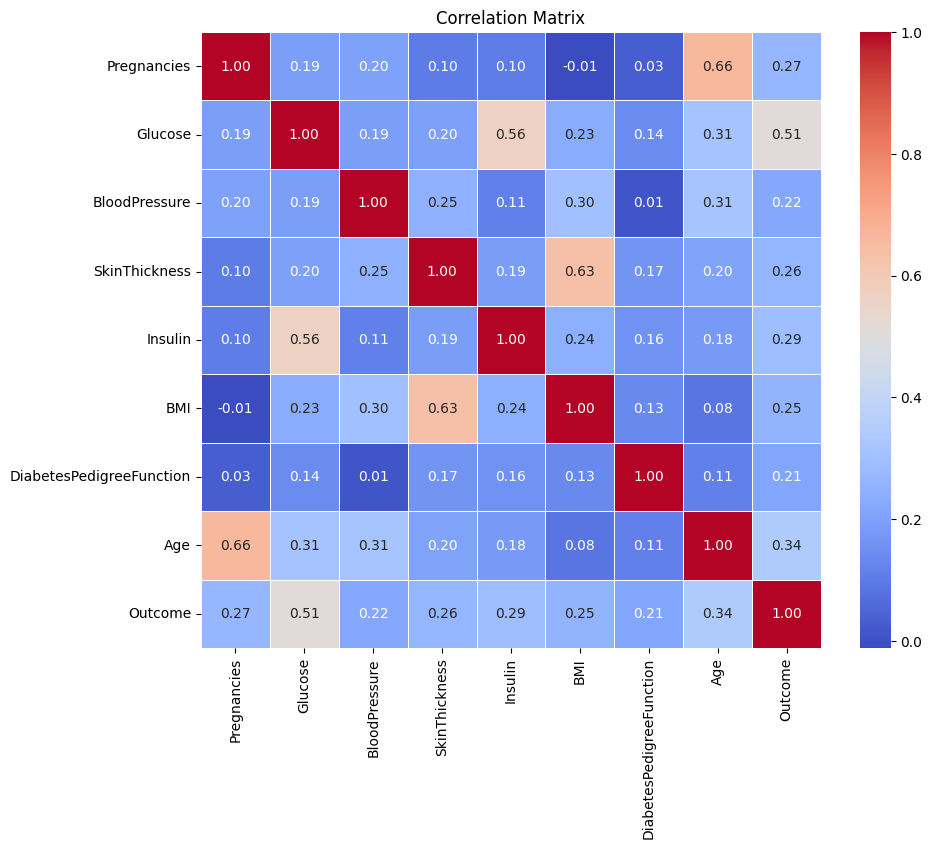

In [44]:
correlation_matrix = diabetes_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

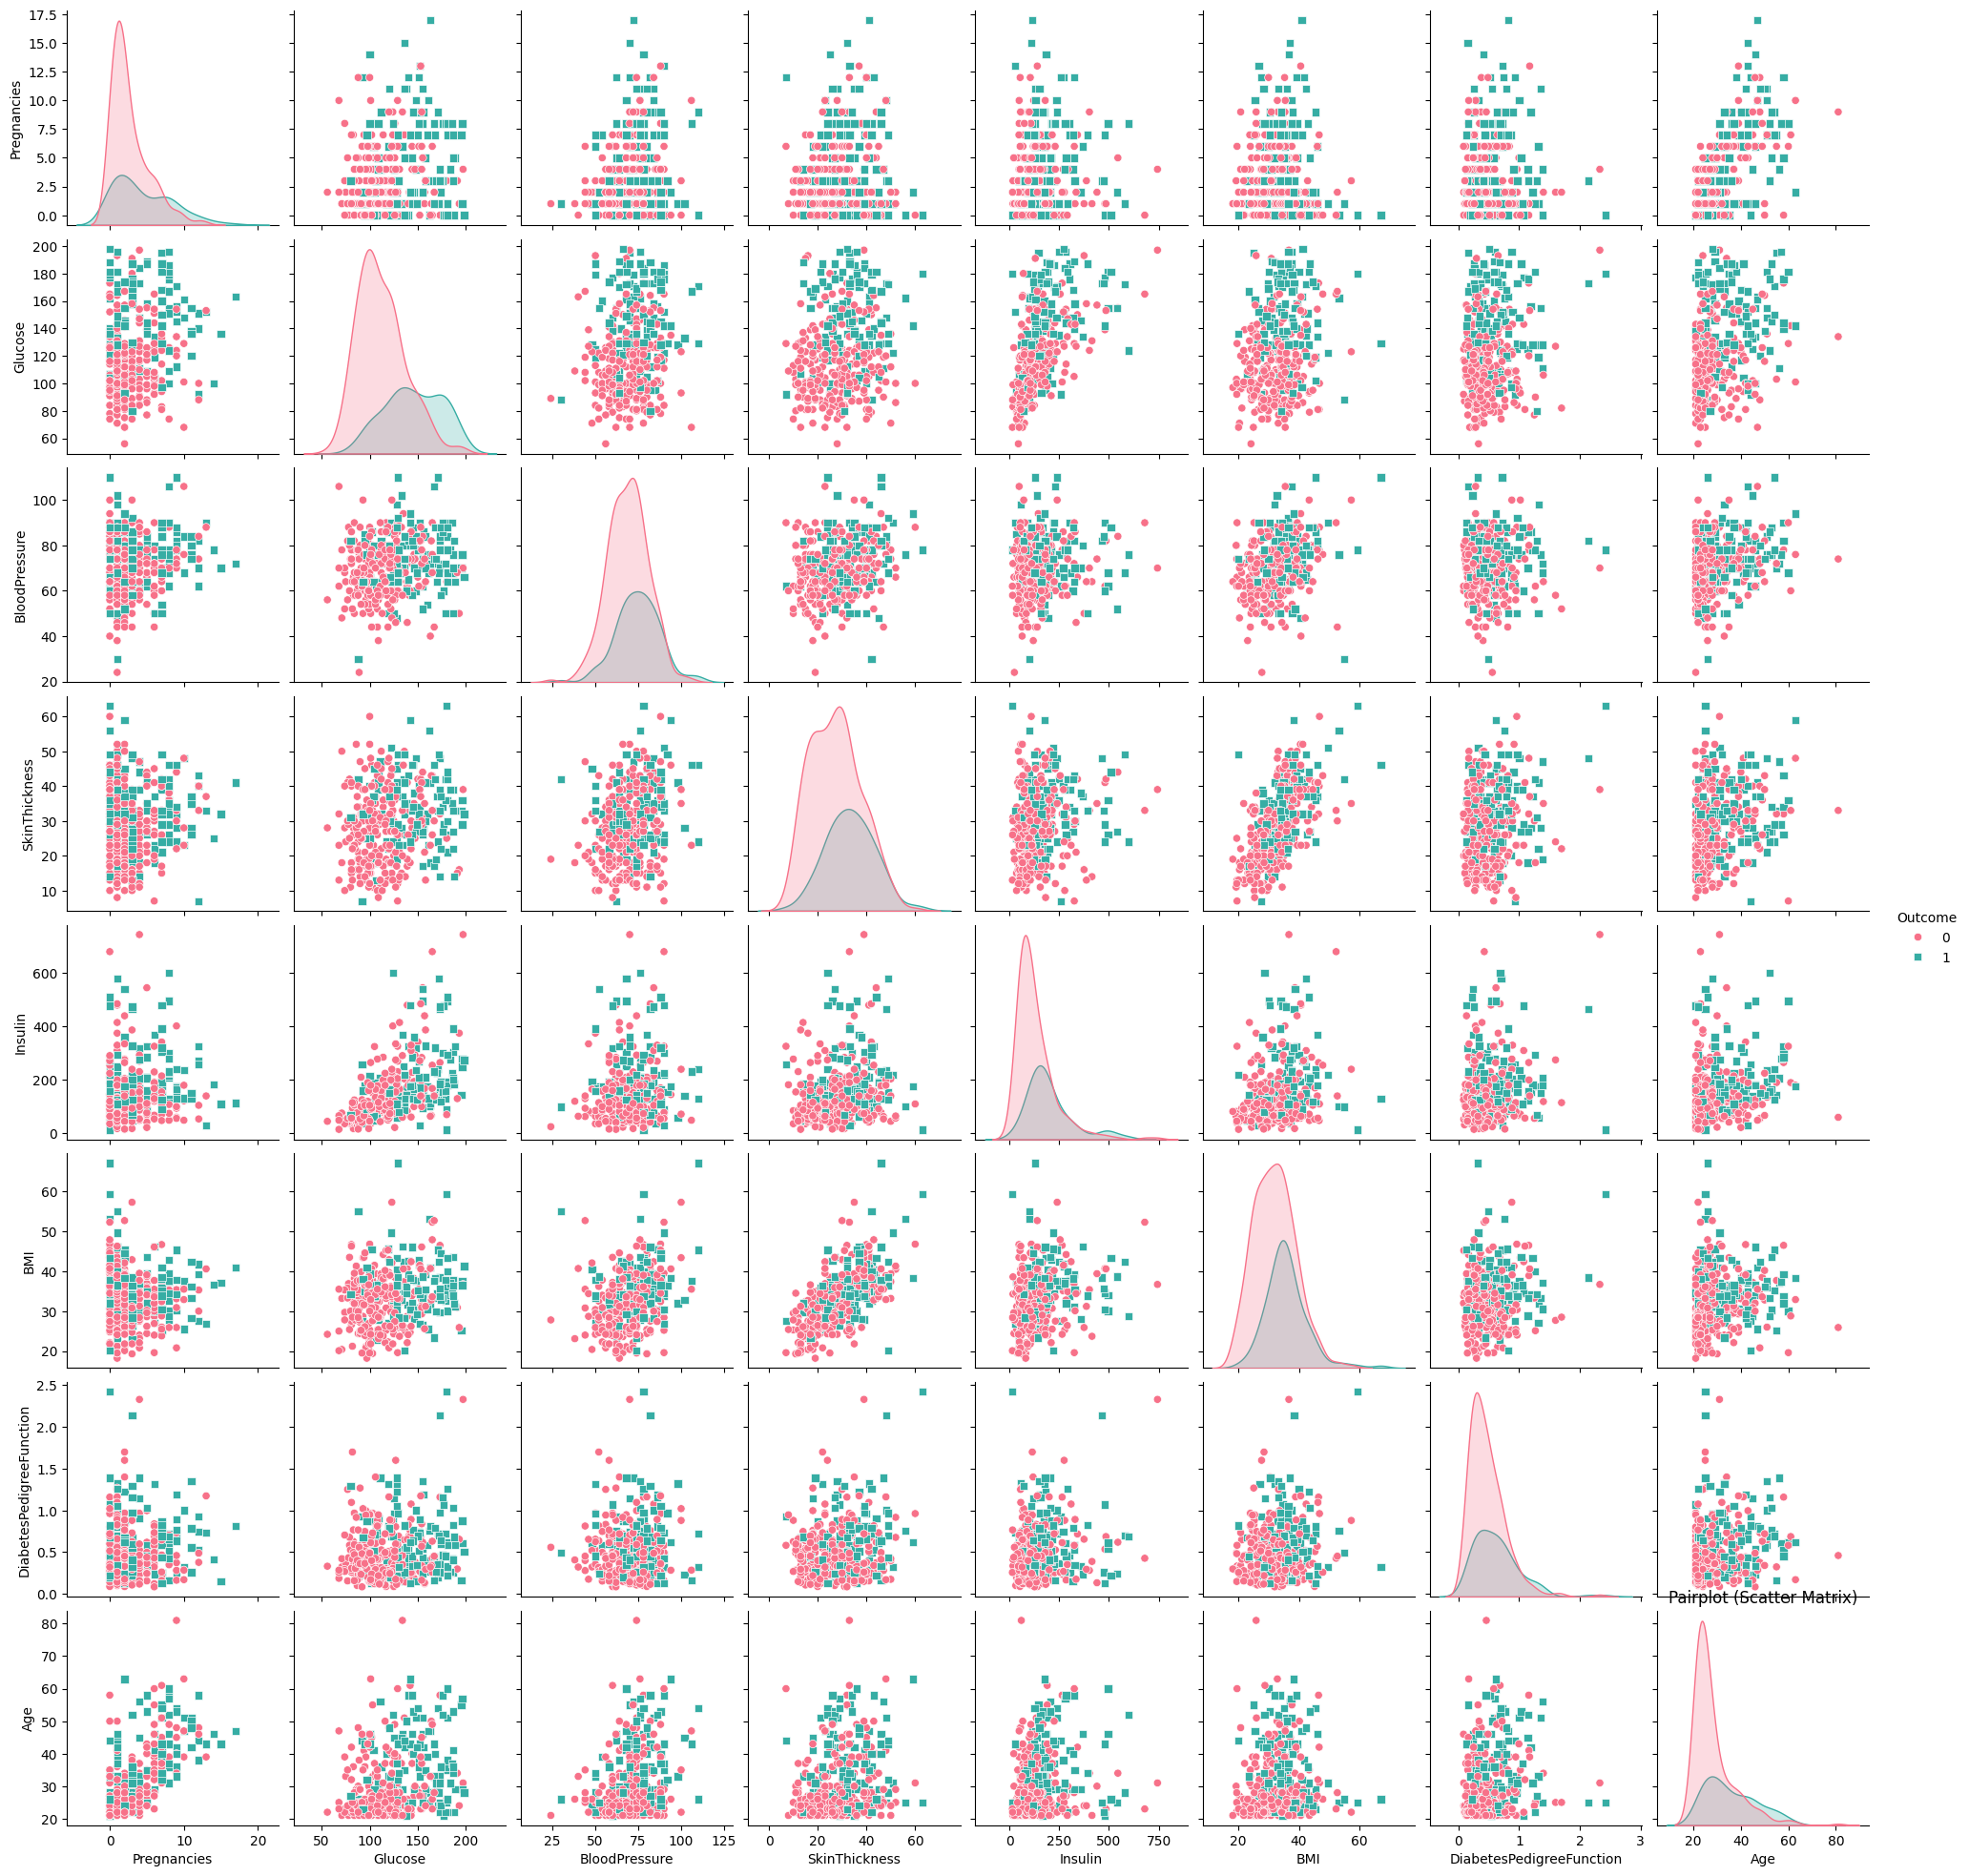

In [45]:
sns.pairplot(diabetes_data, hue='Outcome', palette='husl', markers=["o", "s"])
plt.title('Pairplot (Scatter Matrix)')
plt.show()


In [46]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
model = Sequential([
    Dense(64, input_dim=8, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [48]:
#testing
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [49]:
#training
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)

In [50]:
# Evaluating the model
_, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 74.03


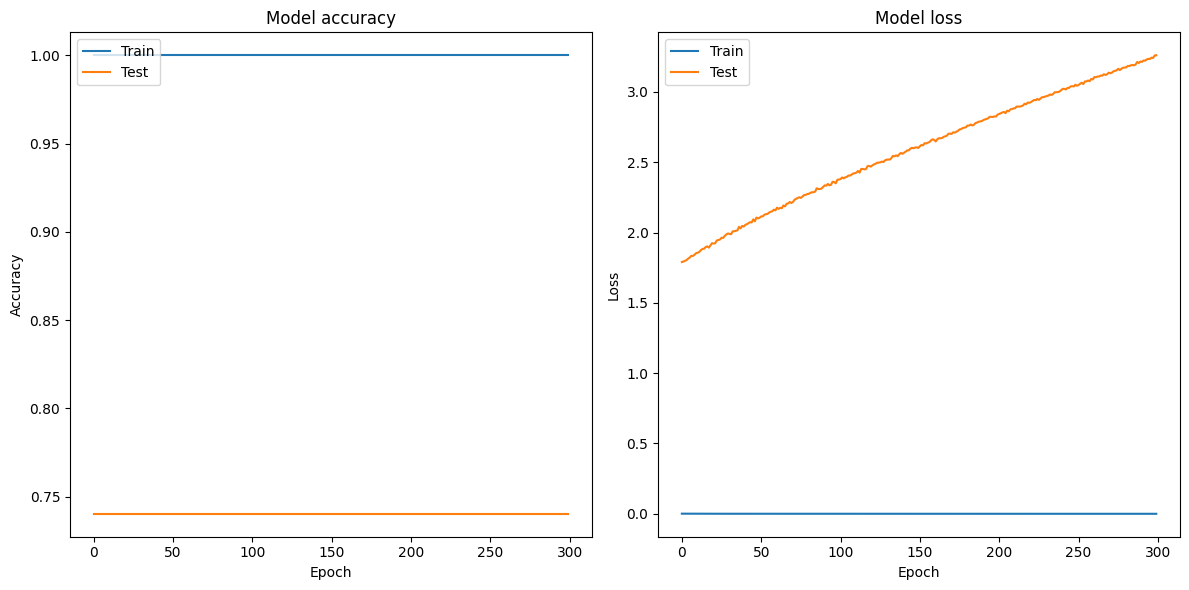

In [51]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train, epochs=300, batch_size=10, verbose=0, validation_data=(X_test, y_test))
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()
